Estimate of Pi: 3.272
Actual Pi Value: 3.141592653589793


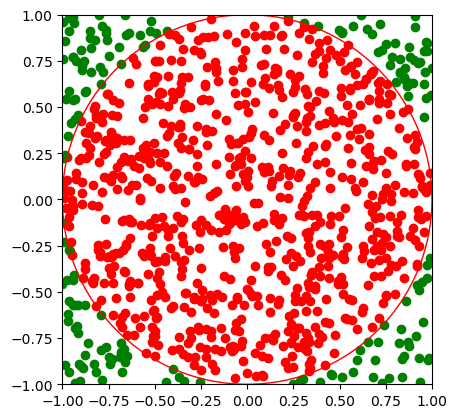

In [3]:
#Calculate Pi using a circle in a square region
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import random

#Number of points
n=1000

#Defining sizes of the circle and square regions
circle_r = 1
square_side = 2*circle_r


fig, ax = plt.subplots()
ncircle=0  
for i in range(n):
    x = random.uniform(-1*circle_r,circle_r) #Draw random x values within a range
    y = random.uniform(-1*circle_r,circle_r) #Draw random y values within a range
    #ax.scatter(x,y) #Plot each point individually
    r = x**2 + y**2 #Calculate distance from center of circle
    if r <= circle_r: #If radius of point is less than the circle radius, update count
        ncircle+=1
        ax.scatter(x,y,color = 'r')
    if r>circle_r:
        ax.scatter(x,y,color = 'g')
pi = square_side**2*(ncircle/n)/circle_r #Defines pi
print('Estimate of Pi:',pi)
print('Actual Pi Value:',np.pi)

#Plots Circle and square regions
ax.set_aspect('equal', adjustable='box')
plt.xlim(-1*circle_r, circle_r)
plt.ylim(-1*circle_r, circle_r)
circle = plt.Circle((0, 0), circle_r, color='r', fill=False)
ax.add_patch(circle)

In [13]:
#New subroutine
def pi_estimate(n, circle_r):
    square_side = 2*circle_r
    ncircle=0  
    for i in range(int(n)):
        x = random.uniform(-1*circle_r,circle_r)
        y = random.uniform(-1*circle_r,circle_r)
        r = x**2 + y**2
        if r <= circle_r:
            ncircle+=1
    pi = square_side**2*(ncircle/n)/circle_r
    return pi    

List of Calculated Pi values: [3.15096 3.14672 3.12712 3.13464 3.12864 3.12904 3.15832 3.15032 3.13864
 3.13056]
np.pi: 3.141592653589793


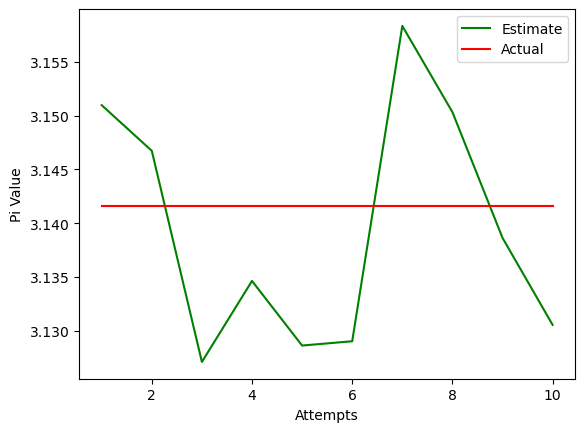

In [5]:
#Estimate of pi using subroutine
pivalues = np.zeros(10)
exactpi = np.zeros(10)
steps = 10
attempts = [1,2,3,4,5,6,7,8,9,10]

#Calculates pi for a specific number of times
for i in range(steps):
    pivalues[i]=pi_estimate(100000,2)
    exactpi[i]=np.pi

plt.xlabel('Attempts')
plt.ylabel('Pi Value')
plt.plot(attempts,pivalues,color='g',label='Estimate')
plt.plot(attempts,exactpi,color='r',label='Actual')
plt.legend()

print('List of Calculated Pi values:',pivalues)
print('np.pi:',np.pi)

In [ ]:
#Explanation
#The values of pi calculated vary a lot between randomizations, but with larger values of n the value tends to get closer to the actual value.
#This would be expected since more data points means a better approximation of the areas of the circle and square.
#There are other ways of calculating pi that would give more accurate answers without needing to simulate a large number of data points.

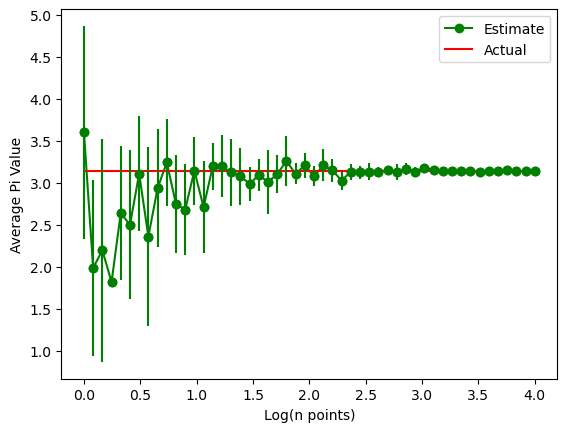

In [17]:
#Convergence Check for number of points

import statistics as stats

#nvalues = np.arange(0,10010,10)
  
#z = np.asarray(nvalues).astype(np.float64)    
#test = np.arange(0,10,2)

#print(nvalues)

circle_r = 1
nvalues = np.logspace(0,4,num=50)#[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
pivalues = np.zeros(len(nvalues))
exactpi = np.zeros(len(nvalues))

piavgvalues = np.zeros(len(nvalues))

#Finds the standard deviation for a sample of a given number of pi estimates at a specific n value
def pi_err(nvalues, circle_r, steps):
    pisample1 = np.zeros(steps)
    for j in range(steps):
        pisample1[j] = pi_estimate(nvalues,circle_r)
    return stats.stdev(pisample1)  

#Finds the average value of pi from a sample of a given number of pi estimates at a specific n value
def pi_avg(nvalues, circle_r, steps):
    pisample2 = np.zeros(steps)
    for j in range(steps):
        pisample2[j] = pi_estimate(nvalues,circle_r)
    return np.mean(pisample2)

#Calculates estimates of pi for each n value and finds the standard deviation of a sample of estimates
y_err = np.zeros(len(nvalues))
for i in range(len(nvalues)):
    y_err[i] = pi_err(nvalues[i], circle_r, 10)
    piavgvalues[i] = pi_avg(nvalues[i], circle_r, 10)
    exactpi[i] = np.pi

#Plots Pi estimate values versus the log of the n value
plt.xlabel('Log(n points)')
plt.ylabel('Average Pi Value')
plt.plot(np.log10(nvalues), piavgvalues, color = 'g', label = 'Estimate', marker = 'o')
plt.plot(np.log10(nvalues), exactpi, color = 'r', label = 'Actual')
plt.errorbar(np.log10(nvalues), piavgvalues, yerr=y_err, color = 'g', fmt="o")
plt.legend()

#Standard deviation decreases with number of points and average value gets closer to pi.

[ 4. 20. 40. 60. 80.]


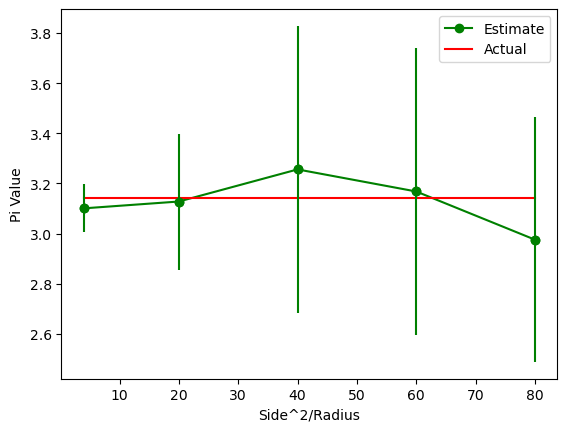

In [19]:
#Convergence check for radius and length

circle_r = [1,5,10,15,20]
square_side =  np.zeros(5)
square2 = np.zeros(5)
x = np.zeros(5)
nvalues = 500
pivalues = np.zeros(5)
exactpi = np.zeros(5)
piavgvalues = np.zeros(5)

for i in range(5):
    square_side = 2*circle_r[i]
    square2[i] = square_side**2
    
for i in range(5):
    x[i] = square2[i]/circle_r[i]
    
#s**2/cr
print(x)
#print(circle_r2)
#print(x)

def pi_estimate(n, circle_r):
    ncircle=0  
    square_side = 2*circle_r
    for i in range(n):
        x = random.uniform(-1*circle_r,circle_r)
        y = random.uniform(-1*circle_r,circle_r)
        r = x**2 + y**2
        if r <= circle_r:
            ncircle+=1
    pi = square_side**2*(ncircle/n)/circle_r
    return pi   

#Finds the standard deviation for a sample of a given number of pi estimates at a specific n value
def pi_err(nvalues, circle_r, steps):
    pisample1 = np.zeros(steps)
    for j in range(steps):
        pisample1[j] = pi_estimate(nvalues,circle_r)
    return stats.stdev(pisample1)  

#Finds the average value of pi from a sample of a given number of pi estimates at a specific n value
def pi_avg(nvalues, circle_r, steps):
    pisample2 = np.zeros(steps)
    for j in range(steps):
        pisample2[j] = pi_estimate(nvalues,circle_r)
    return np.mean(pisample2)

#Calculates estimates of pi for each n value and finds the standard deviation of a sample of estimates
y_err = np.zeros(5)
for i in range(len(circle_r)):
    y_err[i] = pi_err(nvalues, circle_r[i], 10)
    piavgvalues[i] = pi_avg(nvalues, circle_r[i], 10)
    exactpi[i] = np.pi

#Plots Pi estimate values versus the log of the n value
plt.xlabel('Side^2/Radius')
plt.ylabel('Pi Value')
plt.plot(x, piavgvalues, color = 'g', label = 'Estimate', marker = 'o')
plt.plot(x, exactpi, color = 'r', label = 'Actual')
plt.errorbar(x, piavgvalues, yerr=y_err, color = 'g', fmt="o")
plt.legend()

#Standard deviation generally increases as radius of the circle and length of the sides of the square increase. 
# The number of points is constant, so the larger the area, the less good of an area approximator the constant number of points is.